In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets 
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('../dataset/breast-cancer.csv', index_col='id')

In [3]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 31)

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Feature and Label Explanation
* **radius_mean**: Mean of distances from center to points on the perimeter.
* **texture_mean**: Standard deviation of gray-scale values.
* **perimeter_mean**: Mean size of the tumor perimeter.
* **area_mean**: Mean size of the tumor area.
* **smoothness_mean**: Local variation in radius lengths.
* **compactness_mean**: Perimeter² / area - 1.0.
* **concavity_mean**: Severity of concave portions of the contour.
* **concave points_mean**: Number of concave portions of the contour.
* **symmetry_mean**: Symmetry of the tumor.
* **fractal_dimension_mean**: "Coastline approximation" - 1.

### Label Explanation
* **diagnosis**: Target variable indicating whether the tumor is:
  - **M**: Malignant (cancerous).
  - **B**: Benign (non-cancerous).

In [7]:
df.isnull().sum()
# No missing data

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [9]:
cols = list(df.columns[df.columns != 'diagnosis'])
cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [10]:
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [11]:
cols = list(df.columns[df.columns != 'diagnosis'])

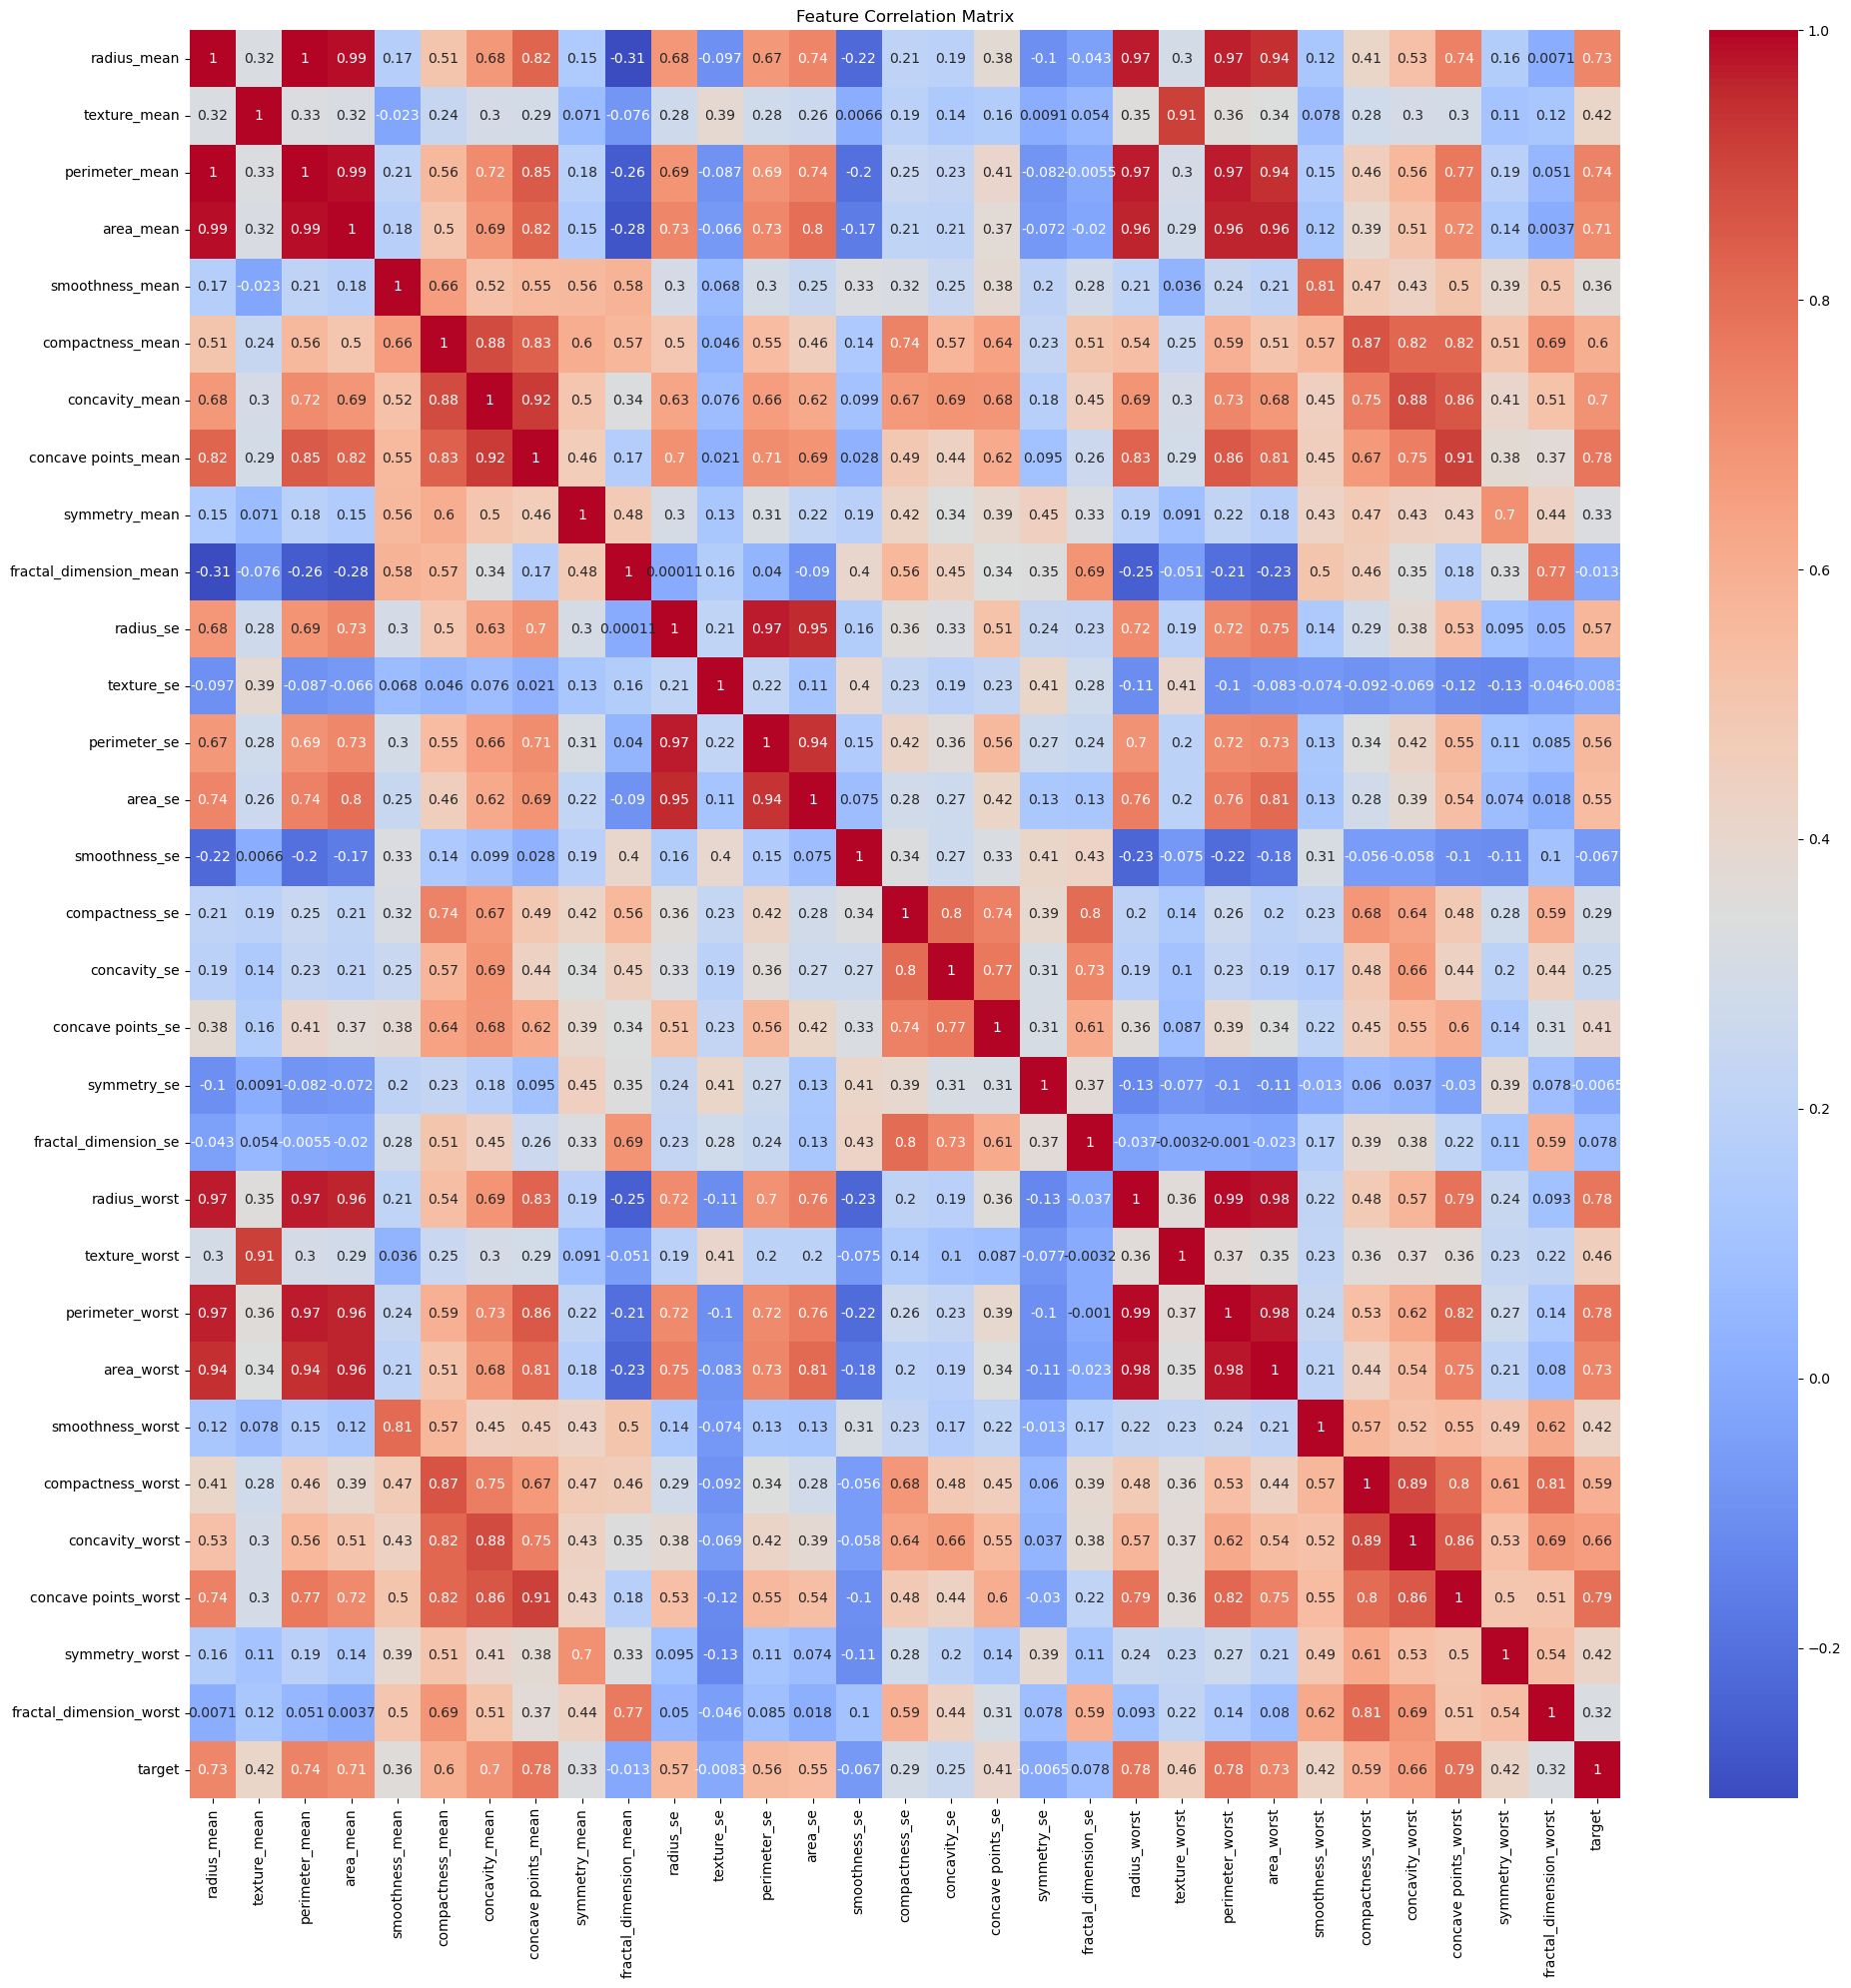

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[cols].corr(), cmap='coolwarm', annot=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

**Most Relevant Columns**
* radius mean
* perimeter_mean
* area_mean
* concavity_mean
* compacthness_mean
* concave points_mean
* radius_se (moderate)
* permiter_se (moderate)
* area_se (moderate)
* radius_worst
* perimeter_worst
* area_worst
* compactness_worst (moderte)
* concavity_worst
* concave_points_worst

In [13]:
# Most relevant columns: radius_mean, perimeter mean

In [14]:
df['diagnosis'].value_counts(normalize=True).to_frame()

,proportion
diagnosis,
B,0.627417
M,0.372583


In [15]:

fig, axs = plt.subplots()

In [16]:
relevant_cols = [
    'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'compactness_mean', 'concave points_mean',
    'radius_se', 'perimeter_se', 'area_se',
    'radius_worst', 'perimeter_worst', 'area_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst'
]

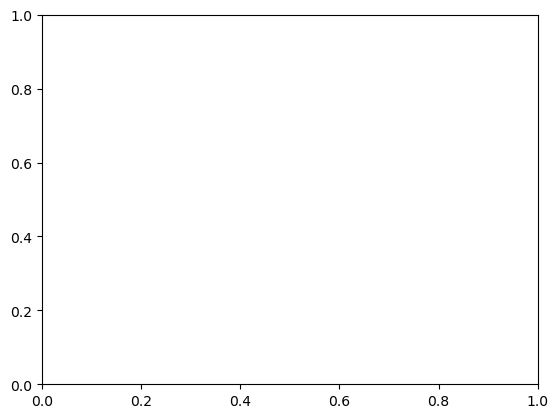

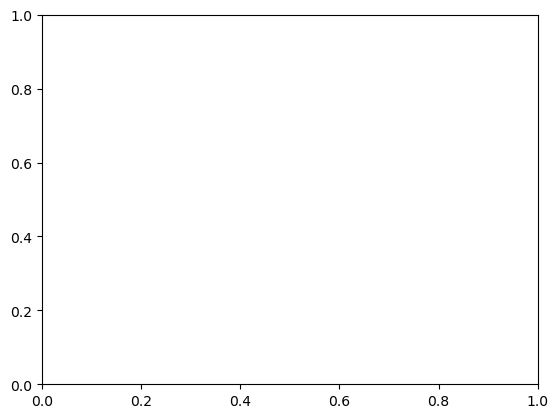

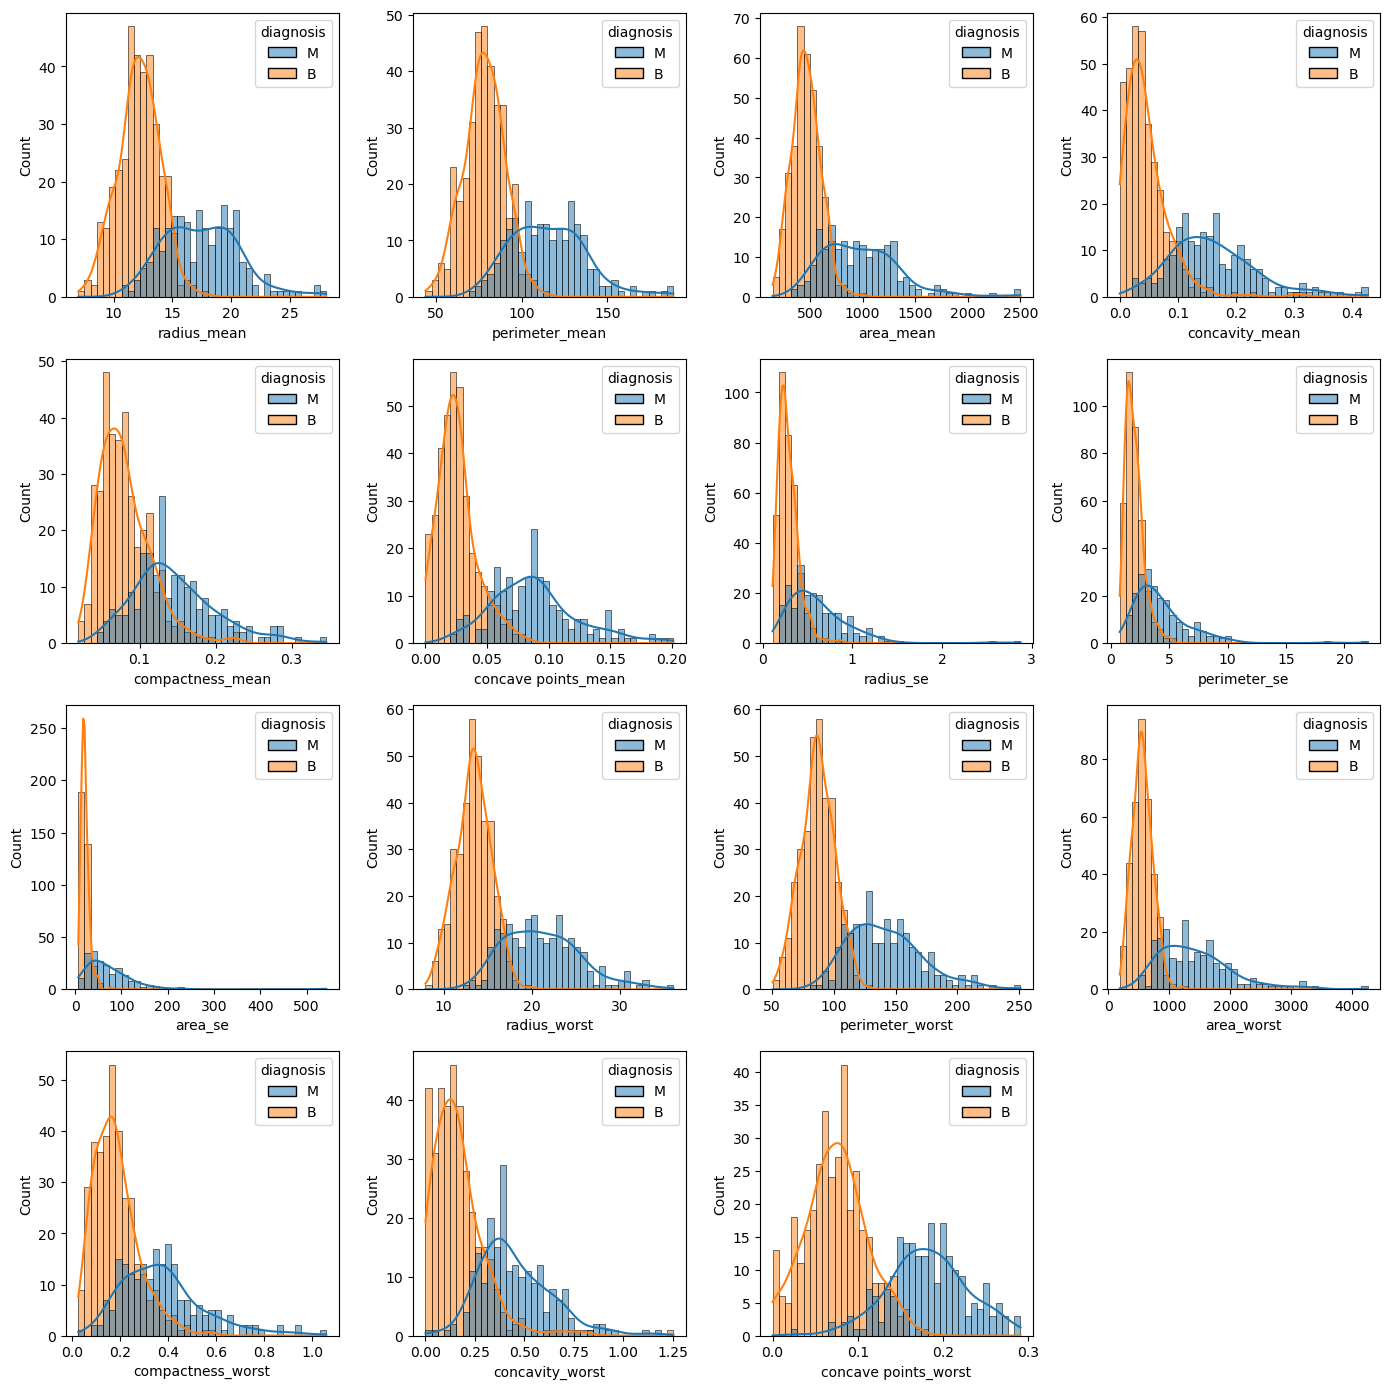

In [17]:
n_rows = 4
n_cols = 4

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        index = r * n_cols + c
        if index < len(relevant_cols):
            ax_i = axs[r, c]
            sns.histplot(data=df, x=relevant_cols[index], bins=40, kde=True, hue='diagnosis', ax=ax_i)
axs.flatten()[15].set_visible(False)
plt.tight_layout()
plt.show()

**Evaluation**

* Radius_mean <= 15 tends to be B
* Perimeter_mean <= 90 tends to be B
* Area_mean <= 650 tends to be B
* Concavity_mean <= 0.1 tends to be B
* Compactness_mean <= 0.12 tends to be B
* Concave points_mean <= 0.05 tends to be B
* Radius_se <= 0.45 tends to be B
* Perimeter_se <= 2.5 tends to be B
* Area_se <= 29 tends to be B
* Radius_worst <= 17 tends to be B
* Perimeter <= 115 tends to be B
* Area_worst <= 750 tends to be B
* Compactness_worst <= 0.22 tends to be B
* Concavity_worst < 0.3 tends to be B
* Concave points_worst < 0.103 tends to be B

**Train Model**
Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        89
           1       0.86      0.93      0.89        54

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred2 = rfc.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)

print(f"Accuracy: {accuracy2:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        89
           1       0.86      0.93      0.89        54

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



In [27]:
# Cross validation
dtc_score = cross_val_score(dtc, X_train, y_train, scoring='accuracy', cv=5)
dtc_score


array([0.90697674, 0.85882353, 0.91764706, 0.90588235, 0.90588235])

In [28]:
np.mean(dtc_score)

0.8990424076607386

In [30]:
rfc_score = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv = 5)
rfc_score

array([0.94186047, 0.94117647, 0.97647059, 0.92941176, 0.95294118])

In [31]:
np.mean(rfc_score)

0.948372093023256

In [44]:
# Grid search for decision tree 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}

dtc_grid_search = GridSearchCV(estimator = dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
dtc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [43]:
print("Best Parameters:", dtc_grid_search.best_params_)
print("Best Cross-Validation Accuracy:", dtc_grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 7, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.922435020519836


In [45]:
# Grid search for random forest

param_grid2 = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
rfc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [46]:
print("Best Parameters:", rfc_grid_search.best_params_)
print("Best Cross-Validation Accuracy:", rfc_grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.9507250341997265


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.99
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        89
           1       0.98      0.98      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

